In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import StandardScaler

In [2]:
# import data
file_path = '/Users/peytonhall/Documents/spring_2025/qbio_465/assignment_5/gene_expression_data.csv'
gene_expression = pd.read_csv(file_path)

In [3]:
gene_expression
# 10 genes across 100 time steps (10x100=1000 columns) + 1 outcome column = 1001 columns
# 1000 samples (rows)

,Gene_0_T0,Gene_1_T0,Gene_2_T0,Gene_3_T0,Gene_4_T0,Gene_5_T0,Gene_6_T0,Gene_7_T0,Gene_8_T0,Gene_9_T0,...,Gene_1_T99,Gene_2_T99,Gene_3_T99,Gene_4_T99,Gene_5_T99,Gene_6_T99,Gene_7_T99,Gene_8_T99,Gene_9_T99,Outcome
0,0.097627,-0.049787,0.205527,0.089766,-0.152690,0.291788,-0.124826,0.783546,0.927326,-0.233117,...,0.159185,-0.610554,-0.105774,0.584065,-0.879559,-0.173836,0.747511,-0.492167,0.191247,1
1,0.185761,-0.058132,-0.048348,0.417541,-0.912049,0.759043,0.040163,-0.938678,-0.551173,0.907351,...,-0.040608,-1.149694,0.513050,-0.221048,0.445109,0.290445,-0.236702,0.232201,-0.077320,0
2,0.623037,-0.017928,0.046312,-0.498959,0.210086,-0.394190,0.154568,-0.660644,-0.681062,-0.165941,...,0.027583,-0.638450,0.807333,-0.306754,0.933588,0.026958,0.066598,0.902396,0.541195,1
3,-0.172075,0.005145,0.557169,0.703116,0.632825,-0.667846,0.656779,-0.882742,-0.599659,0.245853,...,0.476056,-0.499131,0.038942,-0.755467,0.089544,-0.161786,0.588754,0.626540,-0.697716,1
4,-0.414716,-0.079986,-0.725171,-0.300576,-0.893567,-0.241864,-0.771697,0.123626,0.283187,0.974183,...,0.079981,-0.915947,-0.567187,0.506013,-0.311717,-0.842210,-0.574545,-0.152246,0.929752,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.593762,0.153808,0.071671,0.752446,0.622743,-0.760416,0.383363,0.958171,0.473914,-0.530995,...,0.218039,-0.093887,-0.145866,-0.388062,-0.395856,0.194072,-0.155942,0.806168,0.087559,1
996,-0.174807,0.043890,0.099515,-0.190187,-0.309186,-0.770646,-0.677744,0.131807,0.421713,-0.120005,...,-0.053343,-0.596870,-0.224251,-0.538039,0.366357,-0.578175,-0.912318,0.068774,-0.289571,1
997,0.488188,-0.013742,0.517580,0.026080,-0.744035,0.989134,0.492672,0.462991,-0.452601,-0.929000,...,-0.241311,-0.065333,-0.042665,0.354396,1.080867,0.965543,0.131764,-0.757019,0.444370,1
998,0.313251,-0.022585,-0.112935,0.978894,0.804359,-0.811535,-0.614346,0.161425,0.429873,-0.390101,...,0.420597,-0.109644,0.949883,0.778283,-0.493522,-0.734457,-0.698409,0.619684,0.336091,1


# Q1: Visualizing Gene Expression Over Time and Exploring Class Differences [2 pts]

1. Single Sample Visualization: Select a random sample from the dataset. Plot the expression levels of Gene 0 and Gene 1 across all time steps. Use different colors for each gene to distinguish their expression patterns.

In [4]:
sample_22 = gene_expression.iloc[23,:-1]

In [5]:
sample_22

Gene_0_T0    -0.377187
Gene_1_T0    -0.002380
Gene_2_T0    -0.216432
Gene_3_T0    -0.325547
Gene_4_T0    -0.897423
                ...   
Gene_5_T99    0.068316
Gene_6_T99    0.532417
Gene_7_T99   -0.073652
Gene_8_T99    0.148586
Gene_9_T99   -1.080559
Name: 23, Length: 1000, dtype: float64

In [6]:
# reshape into genes and steps
sample_22 = sample_22.values.reshape(10,100)

# pull 0 and 1
gene_0_expression = sample_22[0, :]
gene_1_expression = sample_22[1, :]

#make x 
time_steps = np.arange(100)

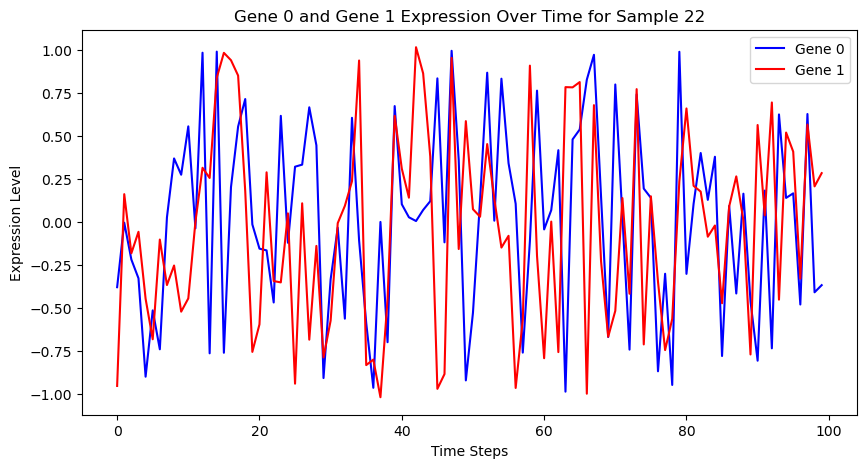

In [7]:
#Plot the expression levels of Gene 0 and Gene 1 across all time steps
plt.figure(figsize=(10, 5))
plt.plot(time_steps, gene_0_expression, label="Gene 0", color="blue")
plt.plot(time_steps, gene_1_expression, label="Gene 1", color="red")
plt.xlabel("Time Steps")
plt.ylabel("Expression Level")
plt.title("Gene 0 and Gene 1 Expression Over Time for Sample 22")
plt.legend()
plt.show()

2. Average Expression Trends: Compute the mean expression of each gene across all samples at every time step. Plot the average expression of the two selected genes over time. Add error bars to indicate standard deviation.

In [8]:
# without outcome column
gene_data = gene_expression.iloc[:,:-1]

# 1000 samples, 10 genes, 100 time steps reshape
gene_data = gene_data.values.reshape(1000,10,100)

In [9]:
# gene 0 mean and sd
gene_0_mean = np.mean(gene_data[:, 0, :], axis=0)
gene_0_std = np.std(gene_data[:, 0, :], axis=0)

# gene 1 mean and sd
gene_1_mean = np.mean(gene_data[:, 1, :], axis=0)
gene_1_std = np.std(gene_data[:, 1, :], axis=0)

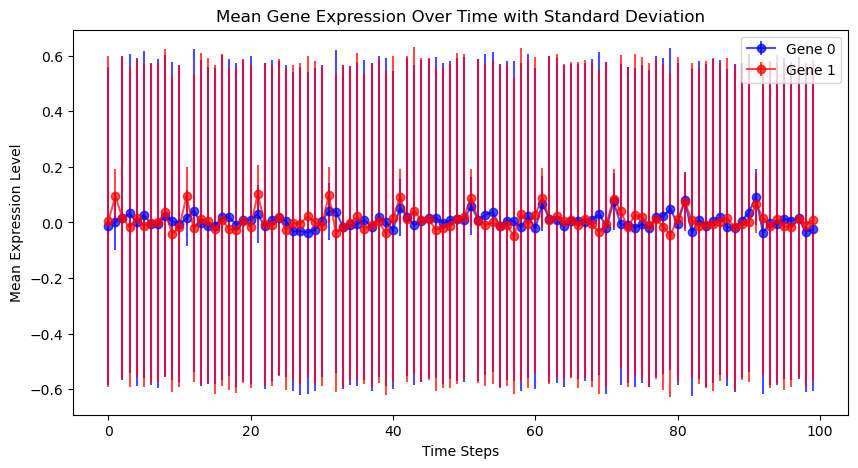

In [10]:
#Plot the average expression of the two selected genes over time
plt.figure(figsize=(10, 5))
plt.errorbar(time_steps, gene_0_mean, yerr=gene_0_std, label="Gene 0", color="blue", fmt="-o", alpha=0.7)
plt.errorbar(time_steps, gene_1_mean, yerr=gene_1_std, label="Gene 1", color="red", fmt="-o", alpha=0.7)
plt.xlabel("Time Steps")
plt.ylabel("Mean Expression Level")
plt.title("Mean Gene Expression Over Time with Standard Deviation")
plt.legend()
plt.show()

3. Separate samples based on the Outcome (Upregulated = 1, Downregulated = 0). Compute the average gene expression over time for each class. Plot the mean expression of Gene 0 and Gene 1 for both classes. Use separate line styles/colors to distinguish between the two classes.

In [11]:
outcome_only = gene_expression.iloc[:,-1]

# separate based on outcome
upregulated = gene_expression[outcome_only == 1]
downregulated = gene_expression[outcome_only == 0]

In [12]:
df_up = upregulated.iloc[:,:-1]
df_down = downregulated.iloc[:,:-1]

In [13]:
# reshape both data
array_up = df_up.to_numpy().reshape(-1,10,100)
array_down = df_down.to_numpy().reshape(-1,10,100)


#mean
mean_upregulated = array_up.mean(axis=0)
mean_downregulated = array_down.mean(axis=0)

In [14]:
print(mean_upregulated.shape)
print(array_up.shape)

(10, 100)
(542, 10, 100)


Yes, a stronger pattern emerges between gene 0 and gene 1, with more visible peaks and spaces between peaks. Upregulated peaks (solid line) account for the upward peaks and downregulated peaks (dotted line) account for downward peaks. Both types seem to combie with each other across gene 0 and 1, contributing to a pattern that wasn't visible with just the expression levels from gene 0 and 1 over time from a random single sample. 

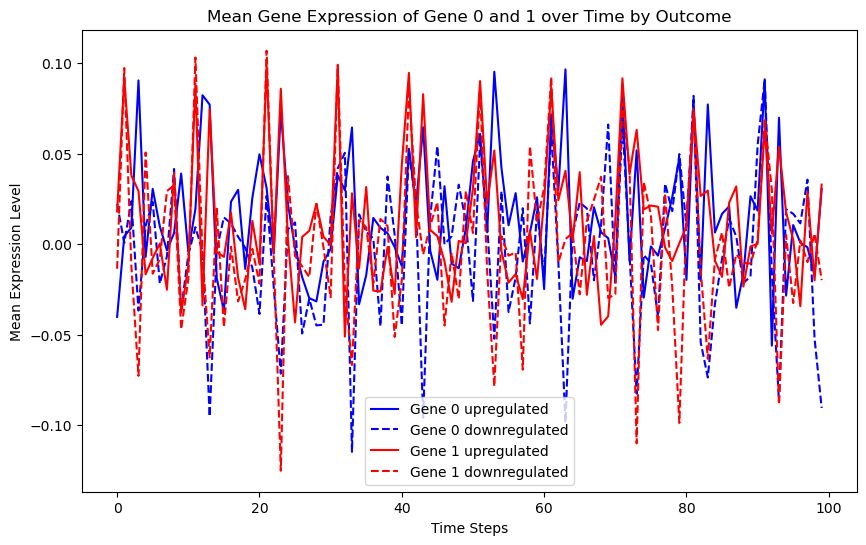

In [15]:
# Plot the mean expression of Gene 0 and Gene 1 for both classes.
plt.figure(figsize=(10, 6))

# gene 0 plot
plt.plot(time_steps, mean_upregulated[0], label="Gene 0 upregulated", linestyle="-", color="blue")
plt.plot(time_steps, mean_downregulated[0], label="Gene 0 downregulated", linestyle="--", color="blue")

# gene 1 plot
plt.plot(time_steps, mean_upregulated[1], label="Gene 1 upregulated", linestyle="-", color="red")
plt.plot(time_steps, mean_downregulated[1], label="Gene 1 downregulated", linestyle="--", color="red")
plt.xlabel("Time Steps")
plt.ylabel("Mean Expression Level")
plt.title("Mean Gene Expression of Gene 0 and 1 over Time by Outcome")
plt.legend()
plt.show()

Yes, temporal patterns for gene 0 and 1 are observed in the class difference plot above. 

# Q2: Fully Connected Neural Network (FCNN) for Gene Expression Classification [1 pts]

1. Load gene_expression_data.csv and divide it into training and testing sets (80-20%
split).

In [16]:
# split data
X = gene_expression.iloc[:,:-1]
y = outcome_only #predicting upregulated or downregulated
#stratify to make sure both classes are proportionally used in testing/training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

2. Develop a Fully Connected Neural Network (FCNN) with at least one hidden dense
layer to classify gene expression dynamics into two classes (upregulation vs.
downregulation).

In [17]:
print(X_train.shape)
model_shape = X_train.shape[1],

(800, 1000)


In [18]:
model_shape

(1000,)

In [19]:
model = keras.Sequential([
    layers.Input(shape=model_shape),
    #hidden layer 1
    layers.Dense(64, activation='relu'), 
    # hidden layer 2
    layers.Dense(64, activation='relu'), 
    # hidden layer 3
    layers.Dense(128, activation='relu'), 
    
    # output layer for binary classification
    layers.Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

3. Train the model for 50 epochs, then report the training and testing accuracy and the
training history.

In [20]:
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

In [21]:
history = model.fit(X_train_np, y_train, 
                    validation_data=(X_test_np, y_test),
                    epochs=50, batch_size=32, verbose=1)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4701 - loss: 0.7066 - val_accuracy: 0.5500 - val_loss: 0.6766
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7652 - loss: 0.5622 - val_accuracy: 0.6150 - val_loss: 0.6398
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9617 - loss: 0.2933 - val_accuracy: 0.6600 - val_loss: 0.7119
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9993 - loss: 0.0344 - val_accuracy: 0.6650 - val_loss: 0.8522
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 0.6600 - val_loss: 0.9547
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.6850 - val_loss: 0.9853
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.6850 - val_loss: 1.0146
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.4983e-04 - val_accuracy: 0.6850 - val_l

In [22]:
# evaluate on training
train_loss, train_acc = model.evaluate(X_train_np, y_train)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 1.0000 - loss: 1.4399e-05


In [23]:
# evaluate on testing data
test_loss, test_acc = model.evaluate(X_test_np, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6697 - loss: 1.3556


In [24]:
print(f"The training accuracy is {train_acc:.3f}")
print(f"The test accuracy is {test_acc:.3f}")

The training accuracy is 1.000
The test accuracy is 0.670


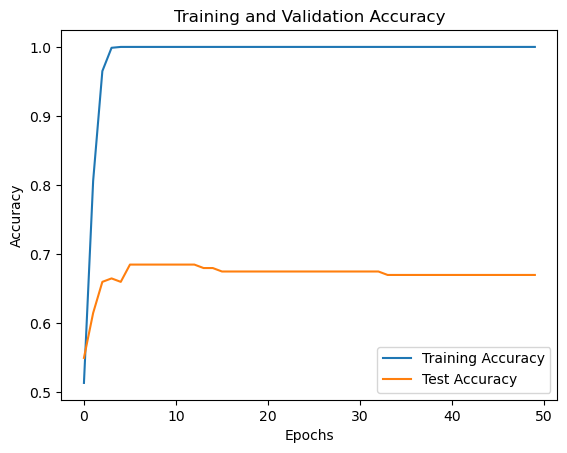

In [25]:
# visualize training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

FCNN performs okay, but there are overfitting issues since the training pefromance is a lot better than the testing accuracy (1 vs 0.67), as well as significant loss above 1. 

Some techniques from class discussions that might improve performance include regularization, dropout, or maybe cross-validation. 

# Q3: LSTM Model for Temporal Gene Expression Classification [2 pts]

1. Preprocess the dataset to match the LSTM input shape: (num_samples,
num_time_steps, num_genes).

In [34]:
print(X_test_np.shape)
print(X_train_np.shape)

(200, 1000)
(800, 1000)


In [28]:
# optional params for both training/testing use
def normalizationFunct(data, min_train=None, max_train=None):
    if min_train is None:
        #fit on training
        min_train = np.min(data, axis=0)
    if max_train is None:
        # testing
        max_train = np.max(data, axis=0)
    # no dividion by 0 if values in a column are the same
    epsilon = 1e-8
    return (data - min_train) / (max_train - min_train + epsilon), min_train, max_train

In [29]:
# apply function to scale X_train and X_test
X_train_scale, minShape, maxShape = normalizationFunct(X_train_np)
X_test_scale,_,_ = normalizationFunct(X_test_np)

In [30]:
X_train_reshaped = X_train_scale.reshape(-1,100,10)
X_test_reshaped = X_test_scale.reshape(-1,100,10)

In [31]:
print(X_train_np.min())
print(X_train_np.max())
print(X_train_scale.min())
print(X_train_scale.max())

-1.61556794123673
1.705500957615274
0.0
0.9999999968407558


In [32]:
print(X_test_reshaped.shape)
print(X_train_reshaped.shape)

(200, 100, 10)
(800, 100, 10)


2. Design an LSTM model for binary classification.

In [35]:
model_lstm = keras.Sequential([
    # 100 time steps, 10 genes 
    layers.Input(shape=(100, 10)), 
    # 50 lstm units
    layers.Bidirectional(layers.LSTM(50, return_sequences=True, dropout=0.2)),
    layers.Bidirectional(layers.LSTM(100, return_sequences=False, dropout=0.2)),
    # Connected layer
    layers.Dense(64, activation='relu'),
     # Output layer for binary classification
    layers.Dense(1, activation='sigmoid') 
])

# compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model_lstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 100, 100)       │        24,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 200)            │       160,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,129 (773.94 KB)

 Trainable params: 198,129 (773.94 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# apply to the model
history_lstm = model_lstm.fit(X_train_reshaped, y_train, 
                              validation_data=(X_test_reshaped, y_test),
                              epochs=50, batch_size=32, verbose=1)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.5538 - loss: 0.6944 - val_accuracy: 0.5400 - val_loss: 0.6811
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.4670 - loss: 0.6973 - val_accuracy: 0.5400 - val_loss: 0.6752
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 275ms/step - accuracy: 0.5753 - loss: 0.6871 - val_accuracy: 0.7000 - val_loss: 0.6692
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - accuracy: 0.5421 - loss: 0.6787 - val_accuracy: 0.5450 - val_loss: 0.6776
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - accuracy: 0.5982 - loss: 0.6769 - val_accuracy: 0.7200 - val_loss: 0.6707
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - accuracy: 0.5722 - loss: 0.6680 - val_accuracy: 0.7450 - val_loss: 0.5865
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.6373 - loss: 0.6408 - val_accuracy: 0.6000 - val_loss: 0.6532
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.5911 - loss: 0.6707 - val_accuracy: 0.

In [37]:
# get training metrics
lstm_train_loss, lstm_train_acc = model_lstm.evaluate(X_train_reshaped, y_train)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7328 - loss: 0.5333


In [38]:
lstm_test_loss, lstm_test_acc = model_lstm.evaluate(X_test_reshaped,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7596 - loss: 0.5141


In [39]:
print(f"The lstm train accuracy is {lstm_train_acc:.3f}")
print(f"The lstm test accuracy is {lstm_test_acc:.3f}")

The lstm train accuracy is 0.762
The lstm test accuracy is 0.770


LSTM architecture captures temporal dependencies with a cell state and different gates, the cell state gets updated based on new input remembered and passed up through gates. The structure I used, which was a bidirectional LSTM, processes the sequence in both forward and backward directions to capture depenendencies/remember in past and future time steps. 

To improve performance, I used bidirectional lstm, dropout, increased lstm units, and stacked layers. 

I used bidirectional lstm since it would help to capture dependencies in forward and backward directions, which in addition to stacking lstm layers made an overall more complex model. From the first bidirectional lstm layer, I output a 3d tensor for the next layer to process it.  The next layer had more lstm units for deeper feature extraction, and output the final hidden state. 

Dropout helped to prevent overfitting and decreased the loss. 

In the class example, softmax activation was used but I used relu in the dense to manage non-linear relationships and sigmoid in the output layer bc binary classification of upregulation or downregulation. 

# Q4: LSTM Model Evaluation and FCNN Comparison [2 pts]

1. Evaluate the LSTM model using the same metrics as in Q2.

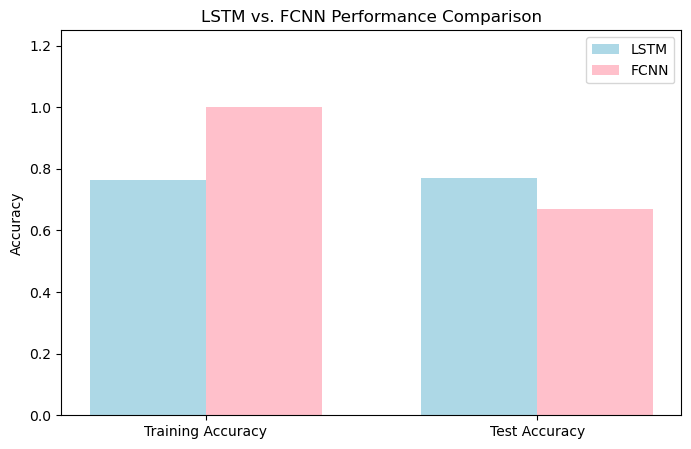

In [40]:
# plot for visualization
# bar labels
categories = ["Training Accuracy", "Test Accuracy"]
bar_width = 0.35
x = np.arange(len(categories))

# accuracies for training and testing for both models
lstm_acc = [lstm_train_acc, lstm_test_acc]
fcnn_acc = [train_acc, test_acc]

# bar plot
plt.figure(figsize=(8, 5))
plt.bar(x - bar_width/2, lstm_acc, bar_width, label="LSTM", color="lightblue")
plt.bar(x + bar_width/2, fcnn_acc, bar_width, label="FCNN", color="pink")

# plt
plt.xticks(x, categories)
plt.ylabel("Accuracy")
plt.ylim(0, 1.25)
plt.title("LSTM vs. FCNN Performance Comparison")
plt.legend()

# Show plot
plt.show()

2. Compare its performance against the FCNN model.

In [42]:
# lstm
print(f"lstm training accuracy: {lstm_train_acc:.3f}")
print(f"lstm testing accuracy: {lstm_test_acc:.3f}")

# fcnn
print(f"fnn training accuracy: {train_acc:.3f}")
print(f"fnn testing accuracy: {test_acc:.3f}")

lstm training accuracy: 0.762
lstm testing accuracy: 0.770
fnn training accuracy: 1.000
fnn testing accuracy: 0.670


There is a much lower difference between the testing and training accuracies for LSTM than in FCNN, indicating much less overfitting, Additionally, the accuracy is higher for LSTM than FCNN. 

LSTM captures gene expression dynamics better because the data contains 10 genes across 100 time steps (is sequential data). FCNN does not account for the order in between time steps, but LSTM is designed for capturing the temporal dependencies in this type of data. 

As a result, LSTMs are stronger than FCNNs in this aspect since they're better for analyzing sequential patterns over 100 time steps. 

However for limitations, LSTM is more computationally expensive and could overfit with limited data, whereas FCNNs are significantly faster but struggle with long term dependencies. 